In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [157]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [158]:
df.shape

(1599, 12)

In [72]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [73]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# summary statistics

In [75]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
#observations
#check relatin b/w mean and std----there should not be so much gap
#b/w mean and 50-percentile

In [77]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [78]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Visualization

In [79]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

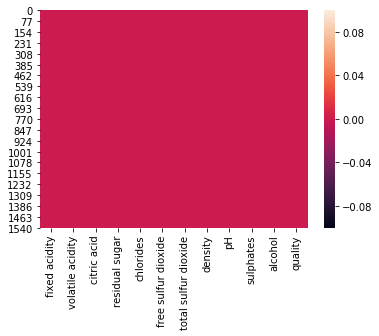

In [80]:
sns.heatmap(df.isnull())

In [81]:
dfcor=df.corr()

In [82]:
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


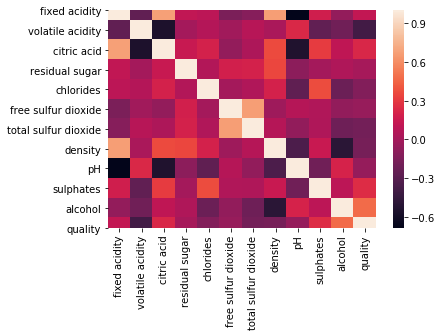

In [83]:
sns.heatmap(dfcor)

In [84]:
#sns.color_palette?

In [85]:
#sns.heatmap?

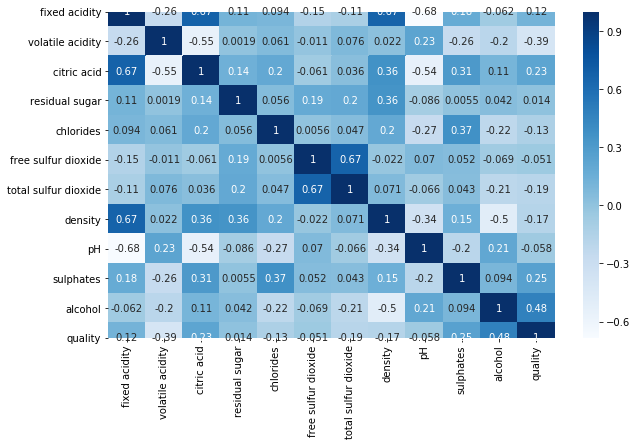

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# plotting outliers

In [87]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

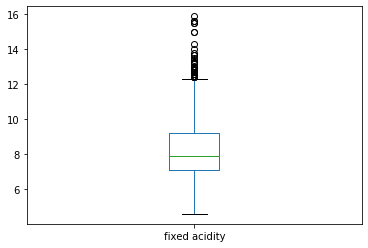

In [88]:
df['fixed acidity'].plot.box()

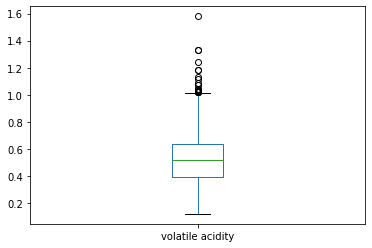

In [89]:
df['volatile acidity'].plot.box()

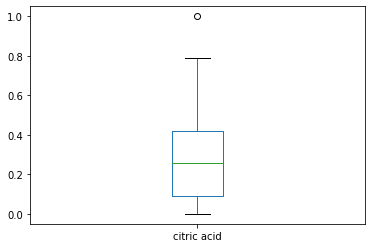

In [90]:
df['citric acid'].plot.box()

In [91]:
df.shape

(1599, 12)

In [92]:
collist=df.columns.values

In [93]:
ncol=12
nrows=10

In [94]:
plt.subplot?

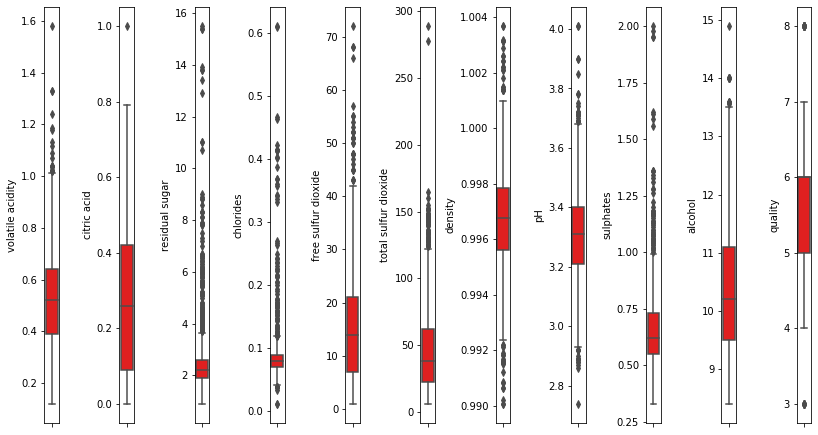

In [95]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

# check distribution of skewness

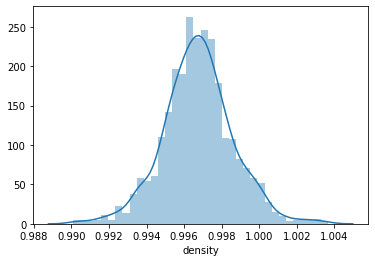

In [96]:
sns.distplot(df['density'])

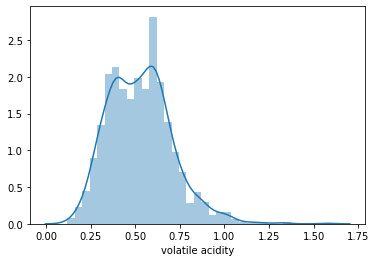

In [97]:
sns.distplot(df['volatile acidity'])

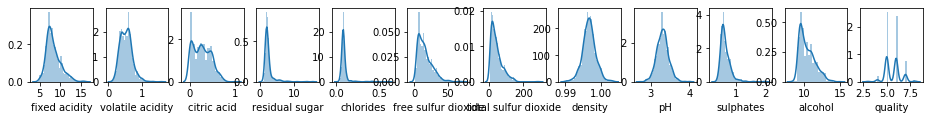

In [98]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

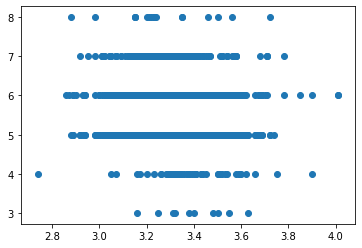

In [99]:
plt.scatter(df['pH'],df['quality'])
plt.show()

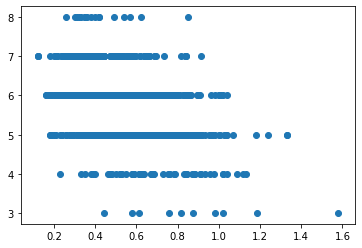

In [100]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.show()

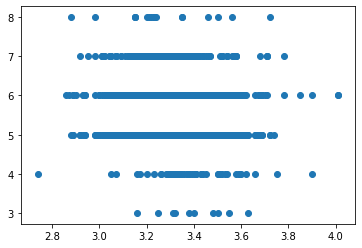

In [101]:
x=df['pH']
y=df['quality']
plt.scatter(x,y)
plt.show()

In [102]:
#df.drop('volatile acidity',axis=1,inplace=True)

In [103]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
df.shape

(1599, 12)

In [125]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
#as we have quality o/p with scale of (3,4,5,6,,7,8)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [128]:
#lets assign a labels to our quality variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [130]:
df['quality'].value_counts()   #here bad becomes 0 and good becomes 1

0    1250
1     201
Name: quality, dtype: int64

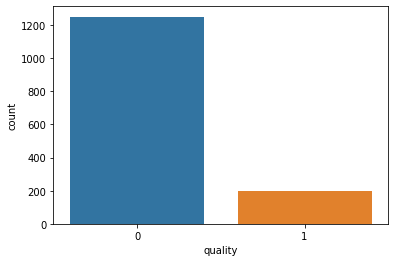

In [131]:
sns.countplot(df['quality'])

#Removing outliers

In [132]:
from scipy.stats import zscore

In [133]:
z=np.abs(zscore(df))
z

array([[0.55292997, 1.05091371, 1.39039974, ..., 0.63645843, 0.99985592,
        0.40099875],
       [0.3099004 , 2.11933582, 1.39039974, ..., 0.2883529 , 0.6081737 ,
        0.40099875],
       [0.3099004 , 1.40705441, 1.18083057, ..., 0.05715007, 0.6081737 ,
        0.40099875],
       ...,
       [1.22126131, 0.07686519, 0.70929993, ..., 0.82782618, 0.56687296,
        0.40099875],
       [1.46429088, 0.72445139, 0.76169222, ..., 0.51955574, 0.21649148,
        0.40099875],
       [1.40353349, 1.26400088, 1.07203802, ..., 0.13421768, 0.56687296,
        0.40099875]])

In [134]:
threshold=3
print(np.where(z>3))

(array([   9,   11,   29,   32,   33,   68,   75,   77,  104,  107,  111,
        120,  127,  128,  129,  130,  134,  157,  158,  169,  183,  187,
        240,  241,  244,  254,  263,  267,  268,  273,  286,  308,  318,
        318,  320,  320,  322,  323,  326,  329,  330,  331,  357,  362,
        364,  364,  364,  389,  402,  422,  426,  426,  427,  427,  444,
        445,  446,  447,  452,  463,  463,  464,  479,  480,  482,  489,
        493,  493,  496,  501,  503,  504,  554,  555,  564,  566,  573,
        577,  581,  591,  602,  604,  612,  612,  625,  625,  658,  687,
        688,  689,  690,  694,  721,  744,  761,  791,  810,  811,  822,
        843,  876,  937,  970,  972,  973,  987,  989,  991, 1002, 1017,
       1017, 1022, 1023, 1036, 1037, 1045, 1047, 1063, 1077, 1079, 1089,
       1114, 1156, 1204, 1238, 1253, 1265, 1266, 1268, 1271, 1277, 1284,
       1299, 1304, 1308, 1330, 1332, 1336, 1337, 1430], dtype=int64), array([ 3,  3,  3,  3,  3,  9,  6,  8,  4,  6,  1,  6

In [135]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [136]:
df_new.shape

(1322, 12)

In [140]:
#observation
#out of 1599 rows only 1322 rows are left, which means 277 rows were deleted as outliers

In [141]:
df=df_new

In [142]:
df.shape

(1322, 12)

# Now Training:

In [143]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [144]:
x.shape

(1322, 11)

In [145]:
y.shape

(1322,)

In [146]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [148]:
x_train.shape

(885, 11)

In [149]:
y_train.shape

(885,)

In [150]:
x_test.shape

(437, 11)

In [151]:
y_test.shape

(437,)

In [152]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [159]:
lg=LogisticRegression()

In [160]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.9038901601830663
[[374  11]
 [ 31  21]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       385
           1       0.66      0.40      0.50        52

    accuracy                           0.90       437
   macro avg       0.79      0.69      0.72       437
weighted avg       0.89      0.90      0.89       437



In [153]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9244851258581236
[[382   3]
 [ 30  22]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       385
           1       0.88      0.42      0.57        52

    accuracy                           0.92       437
   macro avg       0.90      0.71      0.77       437
weighted avg       0.92      0.92      0.91       437



In [162]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [163]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is :
0.9038901601830663
[[374  11]
 [ 31  21]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       385
           1       0.66      0.40      0.50        52

    accuracy                           0.90       437
   macro avg       0.79      0.69      0.72       437
weighted avg       0.89      0.90      0.89       437



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is :
0.8558352402745996
[[341  44]
 [ 19  33]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       385
           1       0.43      0.63      0.51        52

    acc